In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # Faz o sistema o operacional usar uma thread no programa, Kmeans utliza muitas threads segurança 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
X_Score_Income = data.iloc[:, [3,4]].values

In [5]:
sc = StandardScaler()
X_Score_Income = sc.fit_transform(X_Score_Income)

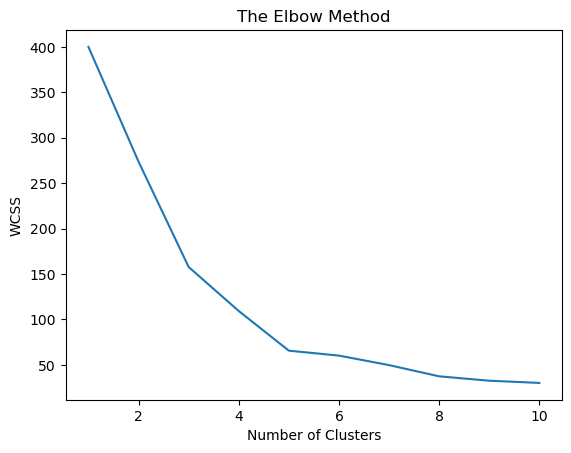

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_Score_Income)
    # Adiciona a inércia (WCSS) à lista
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_Score_Income) # Cria uma coluna dependente para as var

In [8]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [9]:
centroids_scaled = kmeans.cluster_centers_
centroids = sc.inverse_transform(centroids_scaled)
X_Score_Income = sc.inverse_transform(X_Score_Income)

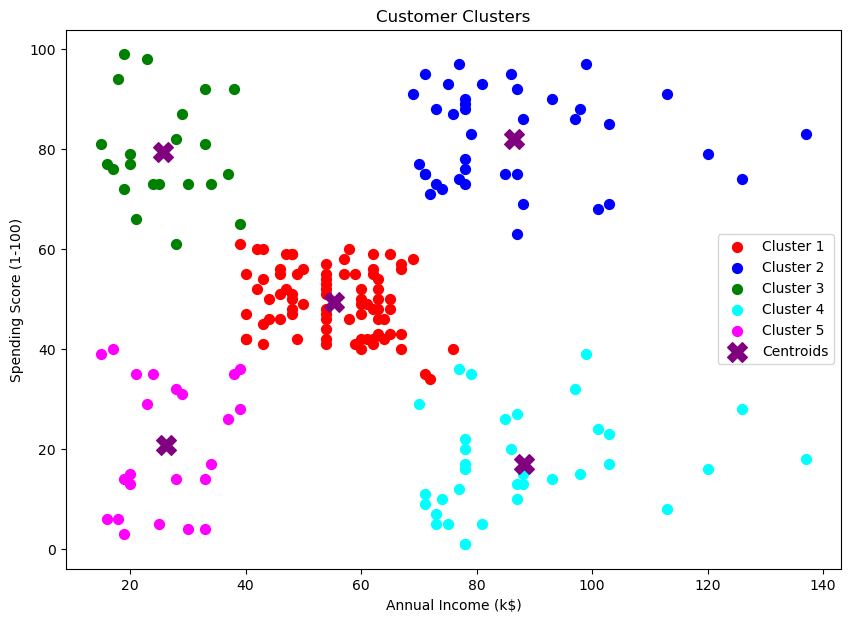

In [10]:
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']
for i in range(5):
    plt.scatter(X_Score_Income[y_kmeans == i, 0], X_Score_Income[y_kmeans == i, 1], 
                s=50, color=colors[i], label=f'Cluster {i+1}')

# Adiciona os centróides ao gráfico
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='purple', label='Centroids', marker='X')

# Adiciona título e rótulos
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()